## Notebook presents the collected data from different perspectives:
- PART 1: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties.
- PART 2: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties and visualizing the population size or population density by the size of the points.
- PART 3: Three plots which represent the whole data cut into 3 parts, dependent on either 'Population' or 'Population Density' properties. The two cutoff points can be define below.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Data file [from here data is read from]
filename = 'data/vax_cases_deaths.csv'

In [8]:
#Path to save figures
path = "figures/"

In [10]:
# This iformation is needed for the title of the figures. THE PERIOD MUST BE SAME AS IN FILE 'Vax_cases_deaths.ipynb' or you can only fill period_start with a custom name and leave period_end blank
period_start = '01/01/2022'
period_end = '01/31/2022'

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [9]:
pop_min = 1000
pop_max = 100000000000000

### Choose cutoff points for part 3 and the property on which the plots will be dependent, either 'Population' or 'Population Density'

In [11]:
plot_dep = 'Population Density' #'Population'

cut_point1 = 100
cut_point2 = 12000

### Reading the file and processing/ cleaning the data

In [12]:
df_all = pd.read_csv(filename)

In [13]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]
    
filter_pop['Infections per 10k inhabitants'] = (filter_pop['Cases in given period'])*10000/filter_pop['Population']
filter_pop['Deaths per 10k inhabitants'] = (filter_pop['Deaths in given period'])*10000/filter_pop['Population']

### Part 1

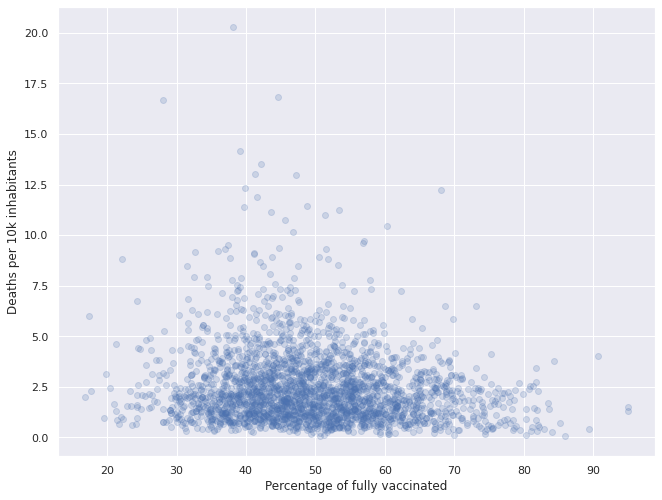

In [14]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop['Percentage of fully vaccinated'], filter_pop['Deaths per 10k inhabitants'], alpha = 0.2)
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'fulvax_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

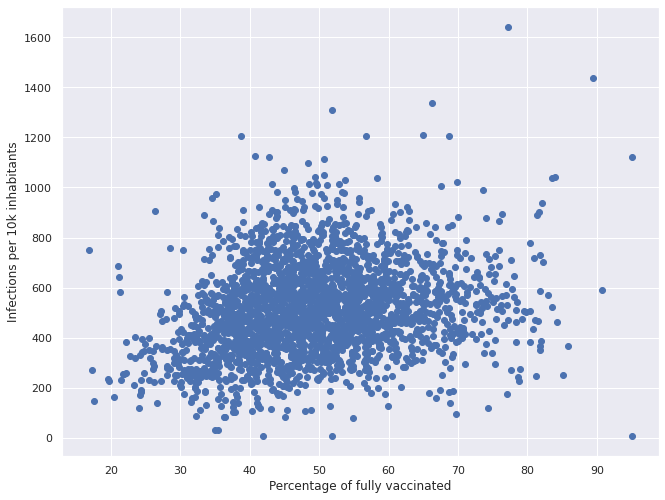

In [15]:
#Present the data of number of cases of infections with COVID19 against percentage of fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop['Percentage of fully vaccinated'], filter_pop['Infections per 10k inhabitants'])
plt.xlabel('Percentage of fully vaccinated')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'fulvax_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

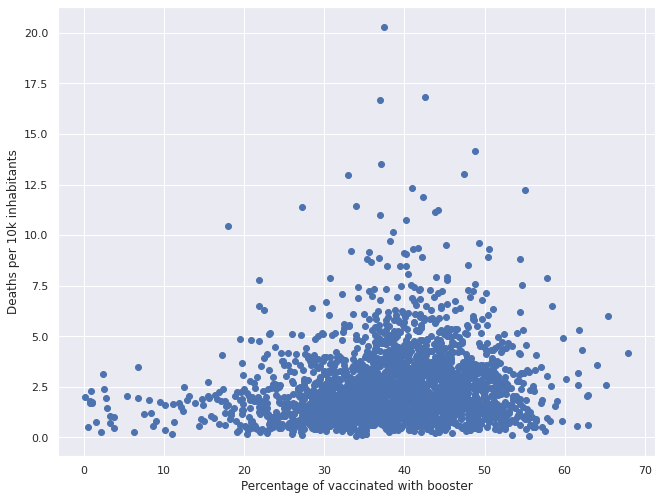

In [16]:
#Present the data of number of deaths caused by COVID19 against percentage of boosted
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop['Percentage of vaccinated with booster'], filter_pop['Deaths per 10k inhabitants'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Deaths per 10k inhabitants')
plt.savefig(path + 'booster_deaths_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

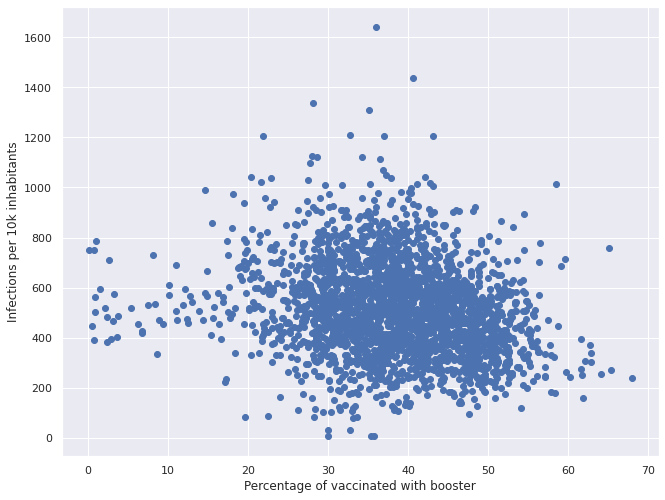

In [17]:
#Present the data of number of cases of infections with COVID19 against percentage of boosted
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop['Percentage of vaccinated with booster'], filter_pop['Infections per 10k inhabitants'])
plt.xlabel('Percentage of vaccinated with booster')
plt.ylabel('Infections per 10k inhabitants')
plt.savefig(path + 'booster_cases_' + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

### Part 2

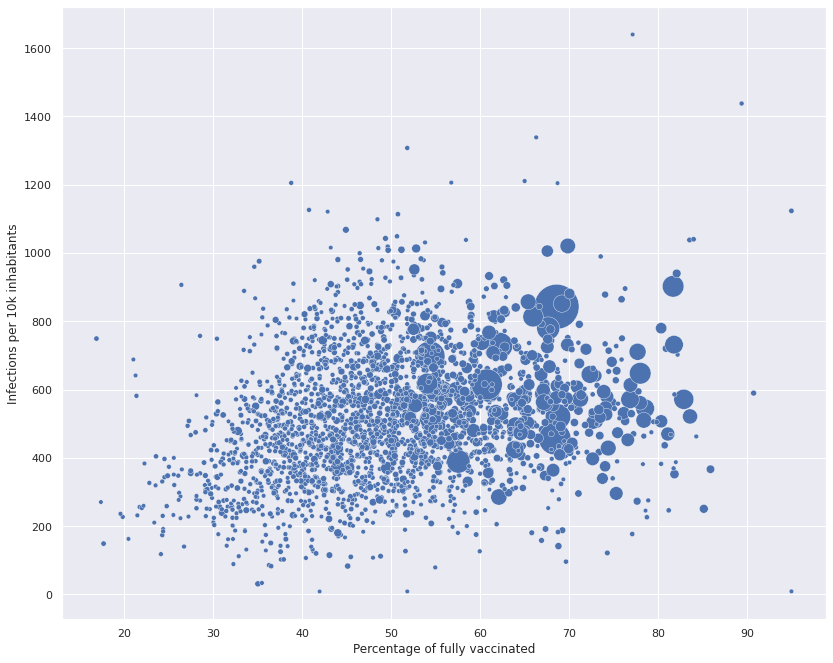

In [32]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
plt.show()

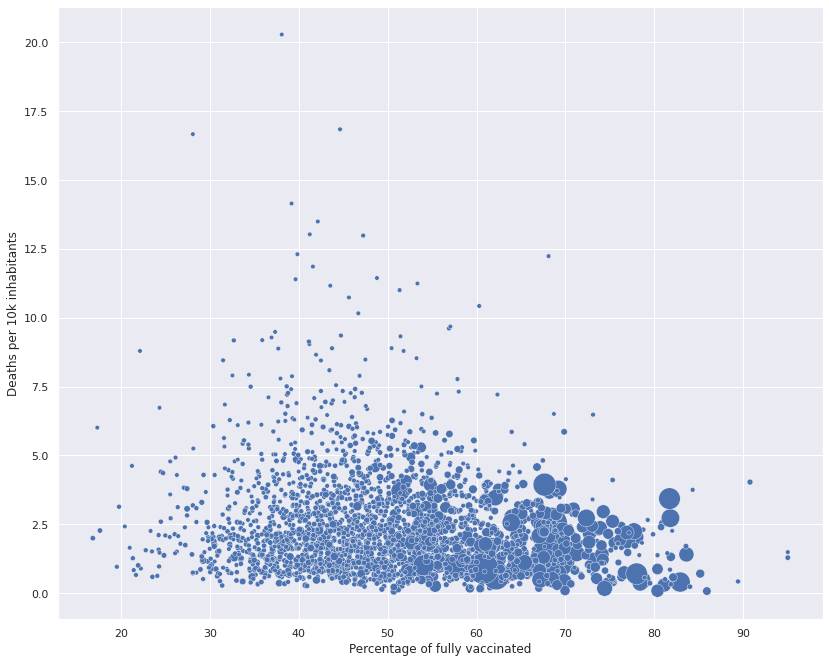

In [33]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", size="Population", legend=False, sizes=(20, 2000))
plt.show()

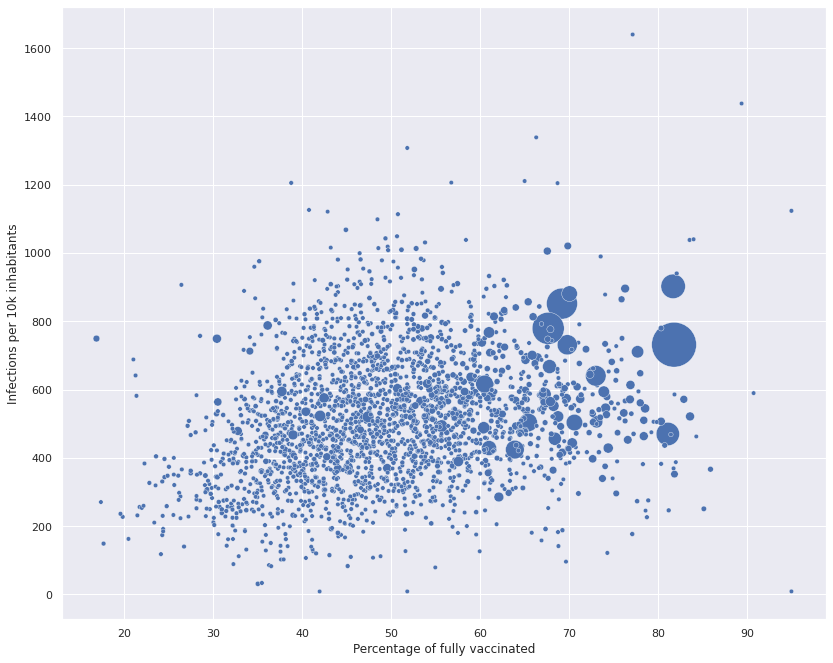

In [34]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", size="Population Density", legend=False, sizes=(20, 2000))
plt.show()

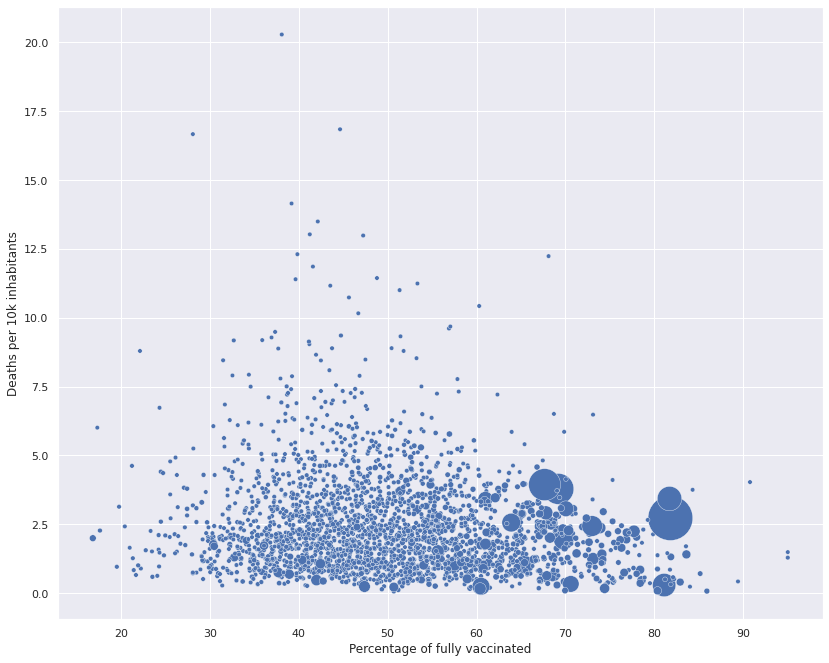

In [35]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", size="Population Density", legend=False, sizes=(20, 2000), alpha=1)
plt.show()

### Part 3. Here are shown 3 plots which represent the whole data cut into 3 parts, based on given above propery ('Population' or 'Population Density').

[Text(0.5, 1.0, 'Population Density: above 12000')]

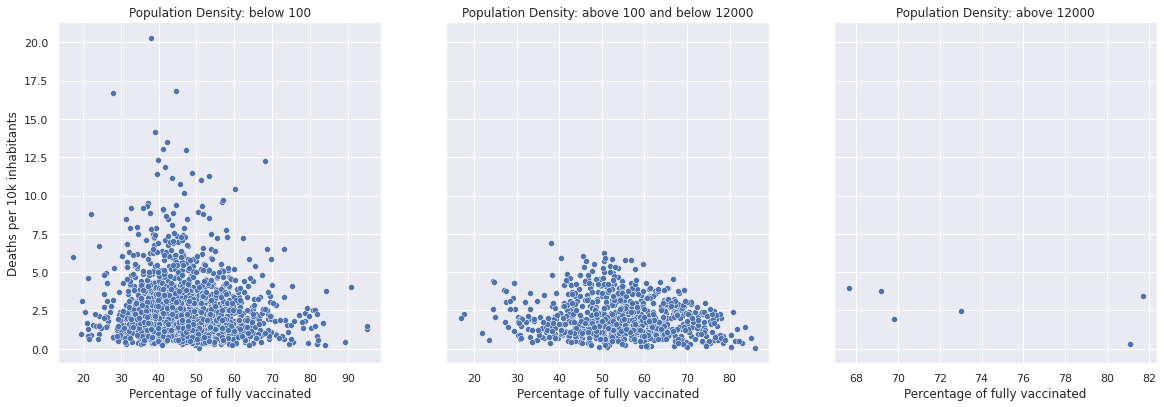

In [29]:
# Plots for deaths

sns.set(rc={'figure.figsize':(19.7,6.27)})
fig, axs = plt.subplots(1,3,  sharey=True)
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ], x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[0]).set(title = plot_dep + ': below ' + str(cut_point1))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ], x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[1]).set(title = plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ], x="Percentage of fully vaccinated", y="Deaths per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[2]).set(title = plot_dep + ': above ' + str(cut_point2))

[Text(0.5, 1.0, 'Population Density: above 12000')]

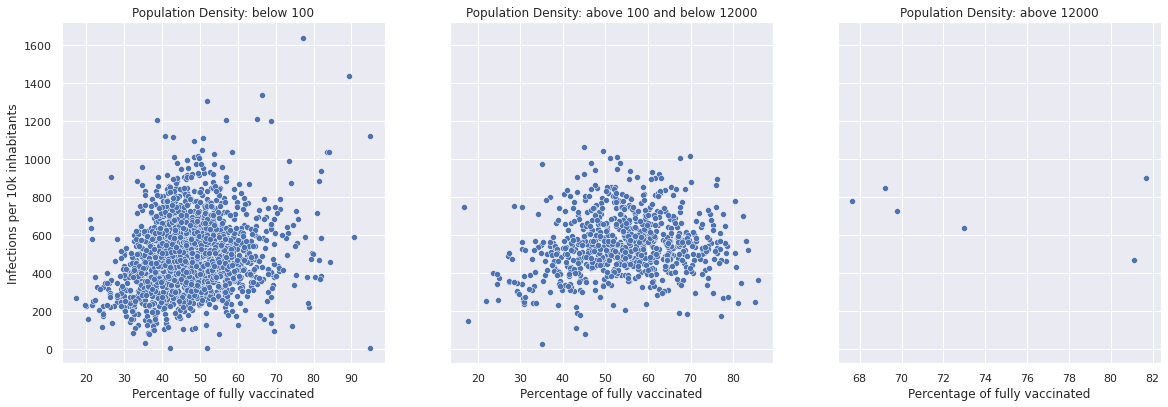

In [30]:
# Plots for cases

sns.set(rc={'figure.figsize':(19.7,6.27)})
fig, axs = plt.subplots(1,3,  sharey=True)
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ], x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[0]).set(title = plot_dep + ': below ' + str(cut_point1))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ], x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[1]).set(title = plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ], x="Percentage of fully vaccinated", y="Infections per 10k inhabitants", legend=False, sizes=(5, 500), alpha=1, ax=axs[2]).set(title = plot_dep + ': above ' + str(cut_point2))

### Part 4. Here data is coloured based on given property and cutoff points

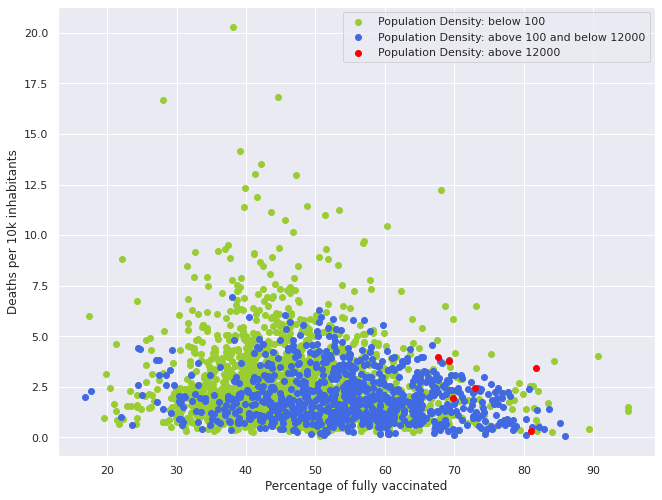

In [53]:
x_name = 'Percentage of fully vaccinated'
y_name = 'Deaths per 10k inhabitants'

sns.set(rc={'figure.figsize':(10.7,8.27)})
data1 = filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ]
plt.scatter(data1[x_name], data1[y_name], color='yellowgreen', label=plot_dep + ': below ' + str(cut_point1))
data2 = filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ]
plt.scatter(data2[x_name], data2[y_name], color='royalblue', label=plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
data3 = filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ]
plt.scatter(data3[x_name], data3[y_name], color='red', label=plot_dep + ': above ' + str(cut_point2))
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.legend()